In [1]:
.L ../libAmBe.so

In [2]:
test

(const int) 11


In [3]:
char const* path {"../dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [4]:
ROOT::RDF::RNode df = dataset.df.Define("chainMaskT9", "decayChainMask(T9.parentid, T9.trackid, T9.pdg, T9.CreatorProcessID, T9.initialEkin)");
df = createT5Mask(df);
double CountAll = df.Count().GetValue();

In [5]:
df = df.Define("volidGamma", "volidEpvtTot(volid[chainMaskT5 == maskGAMMA || chainMaskT5 == maskG_CHILD], edep_pvt[chainMaskT5 == maskGAMMA || chainMaskT5 == maskG_CHILD])");
df = df.Define("edep_pvtGamma", "std::get<1>(volidGamma)");
df = df.Redefine("volidGamma", "std::get<0>(volidGamma)");

In [6]:
df = df.Define("edep_pvtGammaCut", "edep_pvtGamma[edep_pvtGamma < 4.2 && edep_pvtGamma > 0.05]");
df = df.Define("volidGammaCut", "volidGamma[edep_pvtGamma < 4.2 && edep_pvtGamma > 0.1]");

# Energy distribution

In [7]:
ROOT::RDF::RNode dfedist = df.Define("GammaTotalEnergy", "ROOT::VecOps::Sum(edep_pvtGammaCut)");

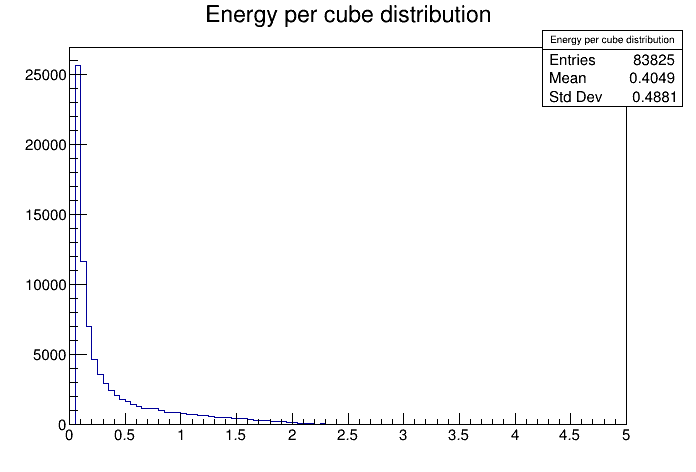

Info in <TCanvas::Print>: pdf file ../plots/pdf/GammaChainEnergy.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/GammaChainEnergy.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/GammaChainEnergy.png has been created


In [8]:
TCanvas c;
auto hist = dfedist.Histo1D(
    {"Energy per cube distribution", "Energy per cube distribution", 100u, 0., 5.},
    "edep_pvtGammaCut"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaChainEnergy"};
savePlot(hist, dir, file);

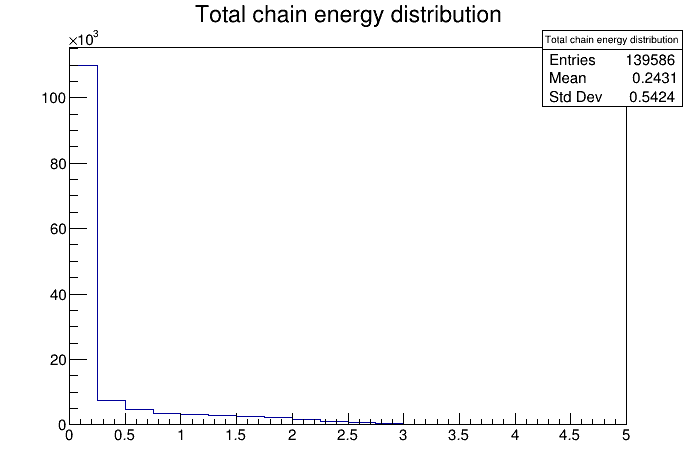

Info in <TCanvas::Print>: pdf file ../plots/pdf/GammaTotalEnergyWithSpike.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/GammaTotalEnergyWithSpike.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/GammaTotalEnergyWithSpike.png has been created


In [9]:
TCanvas c;
auto hist = dfedist.Histo1D(
    {"Total chain energy distribution", "Total chain energy distribution", 20u, 0., 5.},
    "GammaTotalEnergy"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaTotalEnergyWithSpike"};
savePlot(hist, dir, file);

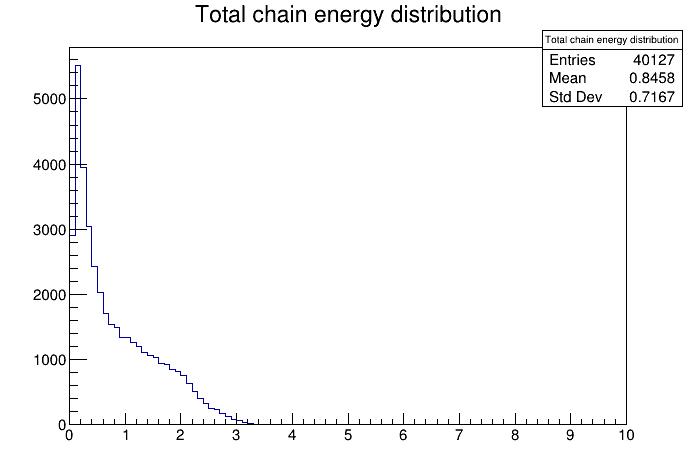

Info in <TCanvas::Print>: pdf file ../plots/pdf/GammaTotalEnergy.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/GammaTotalEnergy.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/GammaTotalEnergy.png has been created


In [10]:
TCanvas c;
auto hist = dfedist.Filter("GammaTotalEnergy").Histo1D(
    {"Total chain energy distribution", "Total chain energy distribution", 100u, 0., 10.},
    "GammaTotalEnergy"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaTotalEnergy"};
savePlot(hist, dir, file);

# Number of cube

In [11]:
ROOT::RDF::RNode dfcount = df.Define("CubeCounter", "volidGammaCut.size()");

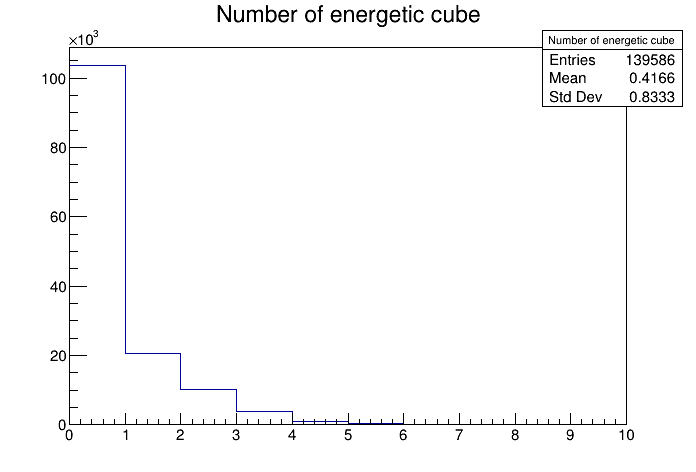

Info in <TCanvas::Print>: pdf file ../plots/pdf/GammaNumberCube.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/GammaNumberCube.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/GammaNumberCube.png has been created


In [12]:
TCanvas c;
auto hist = dfcount.Histo1D(
    {"Number of energetic cube", "Number of energetic cube", 10u, 0., 10.},
    "CubeCounter"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaNumberCube"};
savePlot(hist, dir, file);

# Distance distribution

In [13]:
ROOT::RDF::RNode dfdistance = df.Define("GammaCoM", "centerOfMass(volidGammaCut, edep_pvtGammaCut)");

In [14]:
dfdistance = dfdistance.Define("lastGVolid", "T9.lastVolID[chainMaskT9 == maskGAMMA].size() ? T9.lastVolID[chainMaskT9 == maskGAMMA].at(0): -1");

In [15]:
dfdistance = dfdistance.Define("GammaChainDistFromCoM", "hammingDist(lastGVolid, volidGammaCut)");

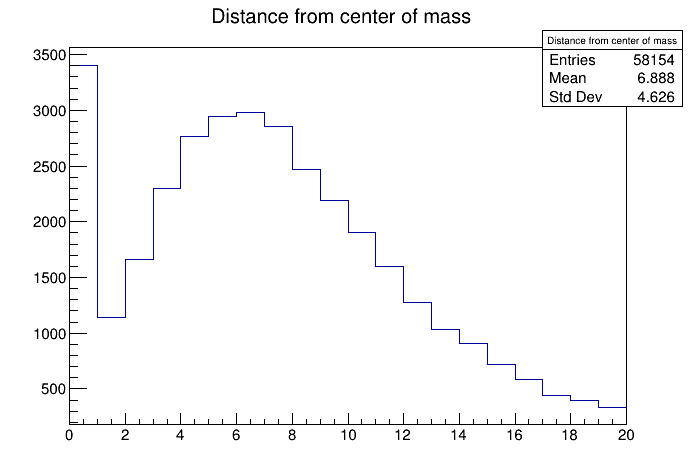

Info in <TCanvas::Print>: pdf file ../plots/pdf/GammaChainDistFromCoM.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/GammaChainDistFromCoM.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/GammaChainDistFromCoM.png has been created


In [16]:
TCanvas c;
auto hist = dfdistance.Histo1D(
    {"Distance from center of mass", "Distance from center of mass", 20u, 0., 20.},
    "GammaChainDistFromCoM"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaChainDistFromCoM"};
savePlot(hist, dir, file);

In [17]:
TCanvas c;
auto hist = dfdistance.Histo1D<ROOT::RVec<double>, ROOT::RVec<double>>(
    {"Weighted distance from most energetic", "Weighted distance from most energetic", 5u, 0., 5.0},
    "CEChainDistFromMaxE", "edep_pvtGammaCut"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"GammaChainWDistFromCoM"};
savePlot(hist, dir, file);